In [ ]:
import numpy as np
from scipy import stats
import pandas as pd
import statsmodels.api as sm
import matplotlib.pylab as plt
from tabulate import tabulate
import seaborn as sns

%matplotlib inline
from sklearn.linear_model import LogisticRegression
from google.colab import drive
#mounting my google driving to access data
drive.mount('/content/drive')

Below I am creating a Pandas data frame of all the UP1 and UP2 sutdents at UNI over the observed time frame.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Second Year Project/Student Data /Logistic_Data_UP_SYG.csv')


df2 = pd.read_csv('/content/drive/MyDrive/Second Year Project/Student Data /Logistic_Data_UP_DFW.csv')



In [ ]:
len(df2)

8943

In [ ]:
def sigm(z):
    return 1 / (1 + np.exp(-z))


In [ ]:
df_test = df[["gender dummy", "DFW dummy"]]

In [ ]:
def check_model(df, b0, b1):

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,6))

    x = np.linspace(-1,4,200)
    p = sigm(b0 + b1*x)

    ax.plot(x, p, color="steelblue", lw=3)
    ax.grid(alpha=0.25)
    ax.set_xlim([-1, 4])
    ax.set_xlabel("Student gender", fontsize=20)
    ax.set_ylabel(r"sigm$(\beta_0 + \beta_1 x)$", fontsize=20)
    plt.yticks([0.0, 0.25, 0.5, 0.75, 1.0])


    x, y = df["First Gen dummy"], df["LA"]

    colors = ["steelblue" if yval==0 else "#a76c6e" for yval in y]
    ax.scatter(x, y, color=colors, s=100)

In [ ]:
# Extract response vector and feature matrix from the DataFrame.  Note that the function
# expects X to be a matrix, which is why we need the reshape function.
y, X = df["DFW dummy"], df["LA"].values.reshape(-1,1)

# Initialize the LogisticRegression method with parameters
logreg = LogisticRegression(fit_intercept=True, C=1000)

# Fit the model to the data
logreg.fit(X, y)

# Extract and print the parameters
b0 = logreg.intercept_[0]
b1 = logreg.coef_[0][0]
print("intercept = {:.3f}, slope = {:.3f}".format(b0, b1))

intercept = -1.209, slope = 0.096


In [ ]:
print("P(DFW grade | Was AALANA student) = {:.5f}".format(sigm(b0+b1*1)))

P(DFW grade | Was AALANA student) = 0.24737


'gender dummy' column has a 1 for male or 0 for female/other

'DFW dummy' column has a 1 for grade of 'D', 'F' or 'W' grade or lower or 0 for else

P(DFW grade |male) = 0.23022

P(DFW grade |female) = 0.22618

P(DFW grade | Had an LA) = 0.14803

P(DFW grade | Did not have an LA) = 0.18722

P(DFW grade | Was not FG student) = 0.16833

P(DFW grade | Was FG student) = 0.20032


In [ ]:
df_NoLA = df[df['LA'] == 0]
df_WithLA = df[df['LA'] == 1]

In [ ]:
Xtrain = df[['LA', 'gender dummy', 'First Gen dummy', 'AALANA dummy']]
ytrain = df['DFW dummy']


log_reg = sm.Logit(ytrain, Xtrain).fit()


# printing the summary table
print(log_reg.summary())


Optimization terminated successfully.
         Current function value: 0.620983
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              DFW dummy   No. Observations:                 1237
Model:                          Logit   Df Residuals:                     1233
Method:                           MLE   Df Model:                            3
Date:                Wed, 03 Apr 2024   Pseudo R-squ.:                 -0.1383
Time:                        00:06:35   Log-Likelihood:                -768.16
converged:                       True   LL-Null:                       -674.83
Covariance Type:            nonrobust   LLR p-value:                     1.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
LA                 -0.8536      0.126     -6.793      0.000      -1.100      -0.607
gender dummy  

Below I am creating a histogram plot to observe all of the different student demography percentages with and without an LA

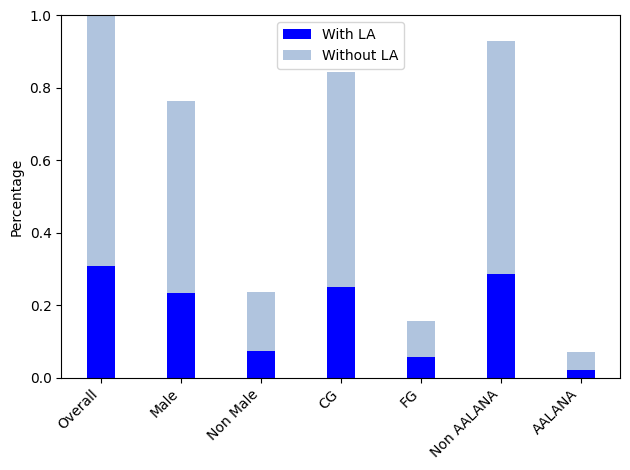

In [ ]:
# Calculate overall percentages
overall_with_LA = len(df[df['LA'] == 1]) / len(df)
overall_without_LA = len(df[df['LA'] == 0]) / len(df)

# Define the calculations for specific groups
male_with_LA = len(df[(df['gender dummy'] == 0) & (df['LA'] == 1)]) / len(df)
male_without_LA = len(df[(df['gender dummy'] == 0) & (df['LA'] == 0)]) / len(df)

female_with_LA = len(df[(df['gender dummy'] == 1) & (df['LA'] == 1)]) / len(df)
female_without_LA = len(df[(df['gender dummy'] == 1) & (df['LA'] == 0)]) / len(df)

CG_with_LA = len(df[(df['First Gen dummy'] == 0) & (df['LA'] == 1)]) / len(df)
CG_without_LA = len(df[(df['First Gen dummy'] == 0) & (df['LA'] == 0)]) / len(df)

FG_with_LA = len(df[(df['First Gen dummy'] == 1) & (df['LA'] == 1)]) / len(df)
FG_without_LA = len(df[(df['First Gen dummy'] == 1) & (df['LA'] == 0)]) / len(df)

non_AALANA_with_LA = len(df[(df['AALANA dummy'] == 0) & (df['LA'] == 1)]) / len(df)
non_AALANA_without_LA = len(df[(df['AALANA dummy'] == 0) & (df['LA'] == 0)]) / len(df)

AALANA_with_LA = len(df[(df['AALANA dummy'] == 1) & (df['LA'] == 1)]) / len(df)
AALANA_without_LA = len(df[(df['AALANA dummy'] == 1) & (df['LA'] == 0)]) / len(df)

# Plotting the histogram
labels = ['Overall', 'Overall without LA',
          'Male', 'Male without LA',
          'Non Male', 'Non Male without LA',
          'CG', 'CG without LA',
          'FG', 'FG without LA',
          'Non AALANA', 'Non AALANA without LA',
          'AALANA', 'AALANA without LA']

values = [overall_with_LA, overall_without_LA,
          male_with_LA, male_without_LA,
          female_with_LA, female_without_LA,
          CG_with_LA, CG_without_LA,
          FG_with_LA, FG_without_LA,
          non_AALANA_with_LA, non_AALANA_without_LA,
          AALANA_with_LA, AALANA_without_LA]

# Plotting the grouped bar chart
width = 0.35  # Width of the bars

# Define colors for "with LA" and "without LA" bars
colors_with_LA = ['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue']
colors_without_LA = ['lightsteelblue', 'lightsteelblue', 'lightsteelblue', 'lightsteelblue', 'lightsteelblue', 'lightsteelblue', 'lightsteelblue']

# Create an array of indices for each group
indices = np.arange(len(labels) // 2)

# Plot "with LA" bars
plt.bar(indices, values[::2], width=width, label='With LA', color=colors_with_LA)

# Plot "without LA" bars stacked on top of "with LA" bars
plt.bar(indices, values[1::2], width=width, bottom=values[::2], label='Without LA', color=colors_without_LA)

#plt.xlabel('University Physics 1 and 2')
plt.ylabel('Percentage')
#plt.title('Students with and without LA by Demographics')

plt.ylim(0, 1)  # Set y-axis limit to [0, 1]

plt.xticks(indices, labels[::2], rotation=45, ha='right')  # Set x-axis labels and rotate for better readability

plt.legend(loc='upper center')  # Move legend to the upper left

plt.tight_layout()
plt.show()


In [ ]:
df_With_AALANA = df[df['AALANA dummy'] == 1]
df_No_AALANA = df[df['AALANA dummy'] == 0]
Xtrain_Only_AALANA = df_With_AALANA[['LA']]
Xtrain_No_AALANA = df_No_AALANA[['LA']]
ytrain_Only_AALANA_DFW = df_With_AALANA['DFW dummy']
ytrain_No_AALANA_DFW = df_No_AALANA['DFW dummy']


ytrain_Only_AALANA_SYG = df_With_AALANA['SYG']
ytrain_No_AALANA_SYG = df_No_AALANA['SYG']


log_reg_Only_AALANA_DFW = sm.Logit(ytrain_Only_AALANA_DFW, Xtrain_Only_AALANA).fit()
log_reg_No_AALANA_DFW = sm.Logit(ytrain_No_AALANA_DFW, Xtrain_No_AALANA).fit()




log_reg_Only_AALANA_SYG = sm.Logit(ytrain_Only_AALANA_SYG , Xtrain_Only_AALANA).fit()
log_reg_No_AALANA_SYG = sm.Logit(ytrain_No_AALANA_SYG, Xtrain_No_AALANA).fit()

# printing the summary table
print(log_reg_Only_AALANA_DFW.summary())
print(log_reg_No_AALANA_DFW.summary())

print(log_reg_Only_AALANA_SYG.summary())
print(log_reg_No_AALANA_SYG.summary())

Optimization terminated successfully.
         Current function value: 0.693147
         Iterations 1
Optimization terminated successfully.
         Current function value: 0.645339
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.592877
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.617064
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              DFW dummy   No. Observations:                   87
Model:                          Logit   Df Residuals:                       86
Method:                           MLE   Df Model:                            0
Date:                Wed, 03 Apr 2024   Pseudo R-squ.:              -9.531e-05
Time:                        00:06:36   Log-Likelihood:                -60.304
converged:                       True   LL-Null:                       -60.298
Covariance Type:            nonrobust  

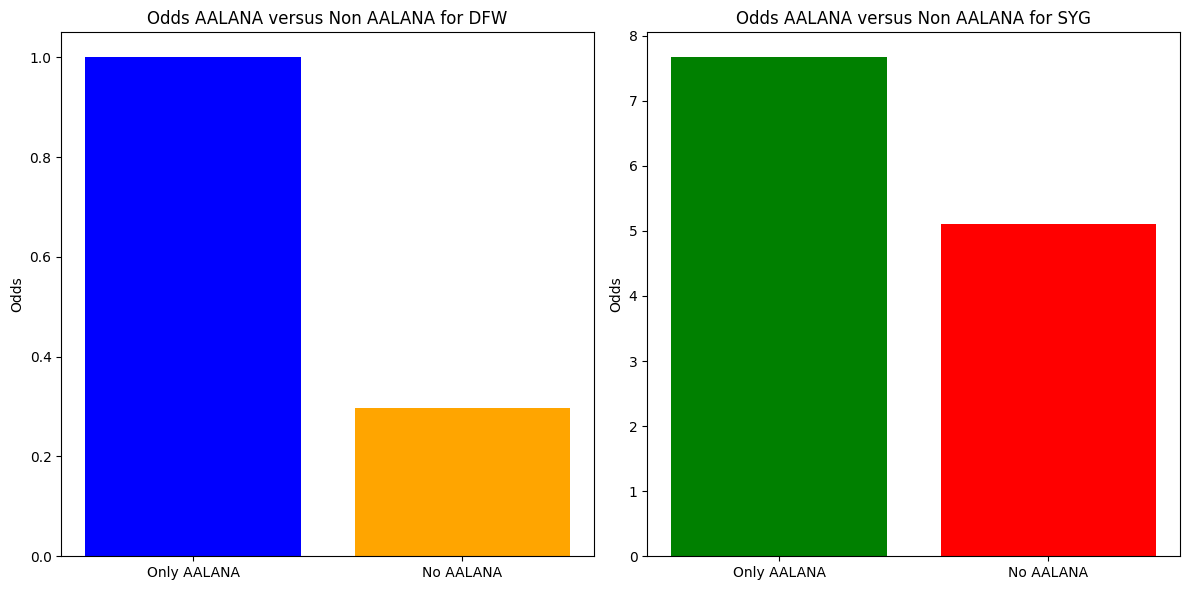

In [ ]:
# Extracting the coefficients and their standard errors
coef_dfw_only = log_reg_Only_AALANA_DFW.params['LA']
coef_dfw_no = log_reg_No_AALANA_DFW.params['LA']

coef_syg_only = log_reg_Only_AALANA_SYG.params['LA']
coef_syg_no = log_reg_No_AALANA_SYG.params['LA']

# Calculating the exponentials
exp_coef_dfw_only = np.exp(coef_dfw_only)
exp_coef_dfw_no = np.exp(coef_dfw_no)

exp_coef_syg_only = np.exp(coef_syg_only)
exp_coef_syg_no = np.exp(coef_syg_no)

# Creating histograms
plt.figure(figsize=(12, 6))

# Histogram for DFW
plt.subplot(1, 2, 1)
plt.bar(['Only AALANA', 'No AALANA'], [exp_coef_dfw_only, exp_coef_dfw_no], color=['blue', 'orange'])
plt.title('Odds AALANA versus Non AALANA for DFW')
plt.ylabel('Odds')  # Set the y-label here for the first subplot

# Histogram for SYG
plt.subplot(1, 2, 2)
plt.bar(['Only AALANA', 'No AALANA'], [exp_coef_syg_only, exp_coef_syg_no], color=['green', 'red'])
plt.title('Odds AALANA versus Non AALANA for SYG')
plt.ylabel('Odds')  # Set the y-label here for the second subplot

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [ ]:
#Running model with only AALANA and added features to calcuate DFW rate


df_With_AALANA = df[df['AALANA dummy'] == 1]
Xtrain_With_AALANA = df_With_AALANA[['LA', 'gender dummy', 'First Gen dummy']]
ytrain_With_AALANA_DFW = df_With_AALANA['DFW dummy']

log_reg_With_AALANA_DFW = sm.Logit(ytrain_With_AALANA_DFW, Xtrain_With_AALANA).fit()
# printing the summary table
print(log_reg_With_AALANA_DFW.summary())


#Running model with no AALANA and added features to calcuate DFW rate
df_WithOut_AALANA = df[df['AALANA dummy'] == 0]
Xtrain_WithOut_AALANA  = df_WithOut_AALANA[['LA', 'gender dummy', 'First Gen dummy']]
ytrain_WithOut_AALANA_DFW = df_WithOut_AALANA['DFW dummy']
log_reg_WithOut_AALANA_DFW = sm.Logit(ytrain_WithOut_AALANA_DFW, Xtrain_WithOut_AALANA).fit()
# printing the summary table
print(log_reg_WithOut_AALANA_DFW.summary())


Optimization terminated successfully.
         Current function value: 0.690388
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              DFW dummy   No. Observations:                   87
Model:                          Logit   Df Residuals:                       84
Method:                           MLE   Df Model:                            2
Date:                Wed, 03 Apr 2024   Pseudo R-squ.:                0.003886
Time:                        00:06:38   Log-Likelihood:                -60.064
converged:                       True   LL-Null:                       -60.298
Covariance Type:            nonrobust   LLR p-value:                    0.7911
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
LA                 -0.1278      0.446     -0.286      0.775      -1.002       0.747
gender dummy  

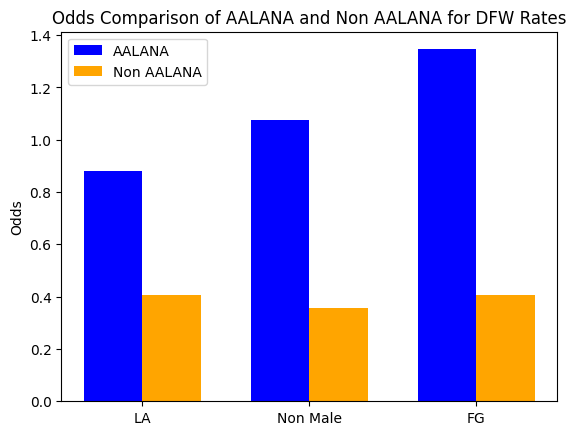

In [ ]:
# Sample data (replace this with your actual values)
exp_coefficients_DFW_with_AALANA = np.exp(log_reg_With_AALANA_DFW.params)
exp_coefficients_DFW_without_AALANA = np.exp(log_reg_WithOut_AALANA_DFW.params)

# Features (replace this with your feature names)
features = ['LA', 'Non Male', 'FG']

# Width of the bars
bar_width = 0.35

# Create a grouped bar plot
fig, ax = plt.subplots()
bar1 = ax.bar(np.arange(len(features)), exp_coefficients_DFW_with_AALANA, bar_width, label='AALANA', color='blue')
bar2 = ax.bar(np.arange(len(features)) + bar_width, exp_coefficients_DFW_without_AALANA, bar_width, label='Non AALANA', color='orange')

# Customize the plot
ax.set_title('Odds Comparison of AALANA and Non AALANA for DFW Rates')
ax.set_xlabel('')
ax.set_ylabel('Odds')
ax.set_xticks(np.arange(len(features)) + bar_width / 2)
ax.set_xticklabels(features)
ax.legend()

# Show the plot
plt.show()




In [ ]:
#Running model with only AALANA and added features to calcuate SYG rate

df_With_AALANA = df[df['AALANA dummy'] == 1]
Xtrain_With_AALANA = df_With_AALANA[['LA', 'gender dummy', 'First Gen dummy']]
ytrain_With_AALANA_SYG = df_With_AALANA['SYG']
log_reg_With_AALANA_SYG = sm.Logit(ytrain_With_AALANA_SYG, Xtrain_With_AALANA).fit()

# printing the summary table
print(log_reg_With_AALANA_SYG.summary())


#Running model for non AALANA and added features to calcuate SYG rate
df_WithOut_AALANA = df[df['AALANA dummy'] == 0]
Xtrain_WithOut_AALANA  = df_WithOut_AALANA[['LA', 'gender dummy', 'First Gen dummy']]
ytrain_WithOut_AALANA_SYG = df_WithOut_AALANA['SYG']


log_reg_WithOut_AALANA_SYG = sm.Logit(ytrain_WithOut_AALANA_SYG, Xtrain_WithOut_AALANA).fit()

# printing the summary table
print(log_reg_WithOut_AALANA_SYG.summary())

         Current function value: 0.458548
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                    SYG   No. Observations:                   87
Model:                          Logit   Df Residuals:                       84
Method:                           MLE   Df Model:                            2
Date:                Wed, 03 Apr 2024   Pseudo R-squ.:                 0.03922
Time:                        00:06:38   Log-Likelihood:                -39.894
converged:                      False   LL-Null:                       -41.522
Covariance Type:            nonrobust   LLR p-value:                    0.1962
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
LA                  1.3552      0.657      2.064      0.039       0.068       2.642
gender dummy       30.0810   8.77e+05   3.43e-05  

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


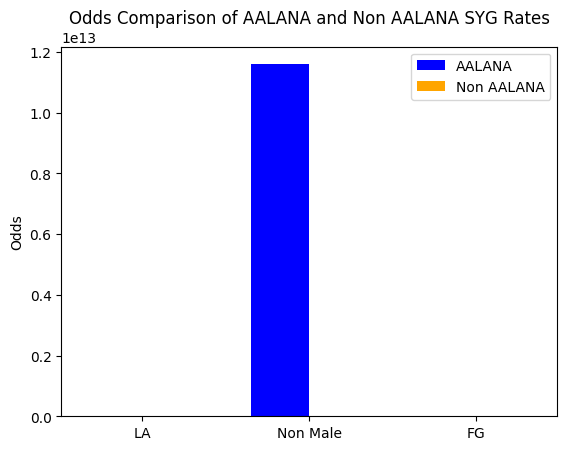

In [ ]:
exp_coefficients_SYG_with_AALANA = np.exp(log_reg_With_AALANA_SYG.params)
exp_coefficients_SYG_without_AALANA = np.exp(log_reg_WithOut_AALANA_SYG.params)

# Features (replace this with your feature names)
features = ['LA', 'Non Male', 'FG']

# Width of the bars
bar_width = 0.35

# Create a grouped bar plot
fig, ax = plt.subplots()
bar1 = ax.bar(np.arange(len(features)), exp_coefficients_SYG_with_AALANA, bar_width, label='AALANA', color='blue')
bar2 = ax.bar(np.arange(len(features)) + bar_width, exp_coefficients_SYG_without_AALANA, bar_width, label='Non AALANA', color='orange')

# Customize the plot
ax.set_title('Odds Comparison of AALANA and Non AALANA SYG Rates')
ax.set_xlabel('')
ax.set_ylabel('Odds')
ax.set_xticks(np.arange(len(features)) + bar_width / 2)
ax.set_xticklabels(features)
ax.legend()

# Show the plot
plt.show()


In [ ]:
#Running model with only Non male students and added features to calcuate DFW rate
df_Gender_Other = df[df['gender dummy'] == 1]
Xtrain_Gender_Other = df_Gender_Other[['LA', 'AALANA dummy', 'First Gen dummy']]
ytrain_Gender_Other_DFW = df_Gender_Other['DFW dummy']

log_reg_Gender_Other_DFW = sm.Logit(ytrain_Gender_Other_DFW, Xtrain_Gender_Other).fit()
# printing the summary table
print(log_reg_Gender_Other_DFW.summary())



#Running model with only male students and added features to calcuate DFW rate
df_Gender_Male = df[df['gender dummy'] == 0]
Xtrain_Gender_Male = df_Gender_Male[['LA', 'AALANA dummy', 'First Gen dummy']]
ytrain_Gender_Male_DFW = df_Gender_Male['DFW dummy']


log_reg_Gender_Male_DFW = sm.Logit(ytrain_Gender_Male_DFW, Xtrain_Gender_Male).fit()
# printing the summary table
print(log_reg_Gender_Male_DFW.summary())


Optimization terminated successfully.
         Current function value: 0.644290
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              DFW dummy   No. Observations:                  292
Model:                          Logit   Df Residuals:                      289
Method:                           MLE   Df Model:                            2
Date:                Wed, 03 Apr 2024   Pseudo R-squ.:                 -0.1962
Time:                        00:06:39   Log-Likelihood:                -188.13
converged:                       True   LL-Null:                       -157.28
Covariance Type:            nonrobust   LLR p-value:                     1.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
LA                 -0.9235      0.244     -3.782      0.000      -1.402      -0.445
AALANA dummy  

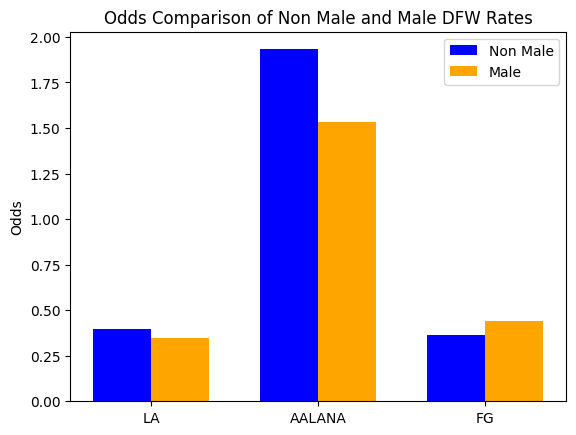

In [ ]:
exp_coefficients_DFW_Non_Male = np.exp(log_reg_Gender_Other_DFW.params)
exp_coefficients_DFW_Male = np.exp(log_reg_Gender_Male_DFW.params)

# Features (replace this with your feature names)
features = ['LA', 'AALANA', 'FG']

# Width of the bars
bar_width = 0.35

# Create a grouped bar plot
fig, ax = plt.subplots()
bar1 = ax.bar(np.arange(len(features)), exp_coefficients_DFW_Non_Male, bar_width, label='Non Male', color='blue')
bar2 = ax.bar(np.arange(len(features)) + bar_width, exp_coefficients_DFW_Male, bar_width, label='Male', color='orange')

# Customize the plot
ax.set_title('Odds Comparison of Non Male and Male DFW Rates')
ax.set_xlabel('')
ax.set_ylabel('Odds')
ax.set_xticks(np.arange(len(features)) + bar_width / 2)
ax.set_xticklabels(features)
ax.legend()

# Show the plot
plt.show()

In [ ]:
#Running model with only Non male students and added features to calcuate SYG rate
df_Gender_Other = df[df['gender dummy'] == 1]
Xtrain_Gender_Other = df_Gender_Other[['LA', 'AALANA dummy', 'First Gen dummy']]
ytrain_Gender_Other_SYG = df_Gender_Other['SYG']


log_reg_Gender_Other_SYG = sm.Logit(ytrain_Gender_Other_SYG, Xtrain_Gender_Other).fit()
# printing the summary table
print(log_reg_Gender_Other_SYG.summary())



#Running model with only male students and added features to calcuate SYG rate
df_Gender_Male = df[df['gender dummy'] == 0]
Xtrain_Gender_Male = df_Gender_Male[['LA', 'AALANA dummy', 'First Gen dummy']]
ytrain_Gender_Male_SYG = df_Gender_Male['SYG']

log_reg_Gender_Male_SYG = sm.Logit(ytrain_Gender_Male_SYG, Xtrain_Gender_Male).fit()
# printing the summary table
print(log_reg_Gender_Male_SYG.summary())


Optimization terminated successfully.
         Current function value: 0.465298
         Iterations 21


LinAlgError: Singular matrix

In [ ]:
exp_coefficients_SYG_Non_Male = np.exp(log_reg_Gender_Other_SYG.params)
exp_coefficients_SYG_Male = np.exp(log_reg_Gender_Male_SYG.params)

# Features (replace this with your feature names)
features = ['LA', 'AALANA', 'FG']

# Width of the bars
bar_width = 0.35

# Create a grouped bar plot
fig, ax = plt.subplots()
bar1 = ax.bar(np.arange(len(features)), exp_coefficients_SYG_Non_Male, bar_width, label='Non Male', color='blue')
bar2 = ax.bar(np.arange(len(features)) + bar_width, exp_coefficients_SYG_Male, bar_width, label='Male', color='orange')

# Customize the plot
ax.set_title('Odds Comparison of Non Male and Male SYG Rate')
ax.set_xlabel('')
ax.set_ylabel('Odds')
ax.set_xticks(np.arange(len(features)) + bar_width / 2)
ax.set_xticklabels(features)
ax.legend()

# Show the plot
plt.show()

In [ ]:
#Running model with only FG students and added features to calcuate DFW rate

df_FG = df[df['First Gen dummy'] == 1]
Xtrain_FG = df_FG[['LA', 'gender dummy', 'AALANA dummy']]
ytrain_FG_DFW = df_FG['DFW dummy']

log_reg_FG_DFW = sm.Logit(ytrain_FG_DFW, Xtrain_FG).fit()
# printing the summary table
print(log_reg_FG_DFW.summary())


#Running model with only CG students and added features to calcuate DFW rate
df_CG = df[df['First Gen dummy'] == 0]
Xtrain_CG = df_CG[['LA', 'gender dummy', 'AALANA dummy']]
ytrain_CG_DFW = df_CG['DFW dummy']



log_reg_CG_DFW  = sm.Logit(ytrain_CG_DFW , Xtrain_CG).fit()
# printing the summary table
print(log_reg_CG_DFW.summary())



In [ ]:
exp_coefficients_DFW_FG = np.exp(log_reg_FG_DFW.params)
exp_coefficients_DFW_CG = np.exp(log_reg_CG_DFW.params)

# Features (replace this with your feature names)
features = ['LA', 'Non Male', 'AALANA']

# Width of the bars
bar_width = 0.35

# Create a grouped bar plot
fig, ax = plt.subplots()
bar1 = ax.bar(np.arange(len(features)), exp_coefficients_DFW_FG, bar_width, label='FG', color='blue')
bar2 = ax.bar(np.arange(len(features)) + bar_width, exp_coefficients_DFW_CG, bar_width, label='CG', color='orange')

# Customize the plot
ax.set_title('Odds Comparison of FG and CG DFW Rate')
ax.set_xlabel('')
ax.set_ylabel('Odds')
ax.set_xticks(np.arange(len(features)) + bar_width / 2)
ax.set_xticklabels(features)
ax.legend()

# Show the plot
plt.show()

In [ ]:
#Running model with only FG students and added features to calcuate SYG rate
df_FG = df[df['First Gen dummy'] == 1]
Xtrain_FG = df_FG[['LA', 'gender dummy', 'AALANA dummy']]
ytrain_FG_SYG = df_FG['SYG']


# printing the summary table
log_reg_FG_SYG = sm.Logit(ytrain_FG_SYG, Xtrain_FG).fit()
print(log_reg_FG_SYG.summary())


#Running model with only CG students and added features to calcuate SYG rate
df_CG = df[df['First Gen dummy'] == 0]
Xtrain_CG = df_CG[['LA', 'gender dummy', 'AALANA dummy']]
ytrain_CG_SYG = df_CG['SYG']


log_reg_CG_SYG = sm.Logit(ytrain_CG_SYG, Xtrain_CG).fit()
print(log_reg_CG_SYG.summary())



In [ ]:
exp_coefficients_SYG_FG = np.exp(log_reg_FG_SYG.params)
exp_coefficients_SYG_CG = np.exp(log_reg_CG_SYG.params)

# Features (replace this with your feature names)
features = ['LA', 'Non Male', 'AALANA']

# Width of the bars
bar_width = 0.35

# Create a grouped bar plot
fig, ax = plt.subplots()
bar1 = ax.bar(np.arange(len(features)), exp_coefficients_SYG_FG, bar_width, label='FG', color='blue')
bar2 = ax.bar(np.arange(len(features)) + bar_width, exp_coefficients_SYG_CG, bar_width, label='CG', color='orange')

# Customize the plot
ax.set_title('Odds Comparison of FG and CG SYG Rates')
ax.set_xlabel('')
ax.set_ylabel('Odds')
ax.set_xticks(np.arange(len(features)) + bar_width / 2)
ax.set_xticklabels(features)
ax.legend()

# Show the plot
plt.show()

In [ ]:


Xtrain_DFW2 = df2[['LA', 'gender dummy', 'First Gen dummy', 'AALANA dummy']]
ytrain_DFW2 = df2['DFW dummy']

log_reg_DFW2 = sm.Logit(ytrain_DFW2, Xtrain_DFW2).fit()
# printing the summary table
print(log_reg_DFW2.summary())



In [ ]:


Xtrain_DFW = df[['LA', 'gender dummy', 'First Gen dummy', 'AALANA dummy']]
ytrain_DFW = df['DFW dummy']

log_reg_DFW = sm.Logit(ytrain_DFW, Xtrain_DFW).fit()
# printing the summary table
print(log_reg_DFW.summary())

In [ ]:
Xtrain_DFW = df[['LA', 'gender dummy', 'First Gen dummy', 'AALANA dummy']]
ytrain_DFW = df['DFW dummy']

log_reg_DFW = sm.Logit(ytrain_DFW, Xtrain_DFW).fit()
# printing the summary table
print(log_reg_DFW.summary())